通过之前对于武汉链家在售二手房数据爬取，我们可针对数据中二手房的大小，楼层，地区，数量来进行可视化展示，来分析其不同因素对二手房在售市场的影响以及趋势

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import re
plt.style.use('fivethirtyeight')
sns.set_style({'font.sans-serif':['simhei','Arial']})
%matplotlib inline

In [2]:
#导入链接二手房数据
f = open('wuhanlianjia.csv','rb')
lianjia_df = pd.read_csv(f)
lianjia_df.head(10)

,Renovation,Garden,Layout,Size,Direction,Elevator,Year,Distric,Floor,Price,house_unit_price,Region
0,简装,阳电里,2室1厅,66.2平米,南,无电梯,2003,唐家墩,中楼层,115.0,单价17372元/平米,江岸
1,其他,育才一村,2室1厅,69.24平米,南,无电梯,1995,育才花桥,高楼层,150.0,单价21664元/平米,江岸
2,精装,吉祥谷,2室2厅,60.56平米,南,none,2005,后湖,低楼层,110.0,单价18164元/平米,江岸
3,其他,翰林紫园,2室1厅,91.49平米,西南,有电梯,2016,二七,高楼层,205.0,单价22407元/平米,江岸
4,其他,晋合金桥世家,2室2厅,95.88平米,南,有电梯,2013,后湖,高楼层,265.0,单价27639元/平米,江岸
5,其他,吉祥谷,2室1厅,44.51平米,西,none,2005,后湖,低楼层,85.0,单价19097元/平米,江岸
6,其他,东立国际,1室1厅,40.91平米,东北,有电梯,2007,二七,中楼层,101.0,单价24689元/平米,江岸
7,其他,统建同安家园,3室2厅,123.92平米,南 北,有电梯,2009,后湖,中楼层,235.0,单价18964元/平米,江岸
8,其他,新地盛世东方,3室2厅,124.01平米,南 北,有电梯,2010,后湖,低楼层,269.0,单价21692元/平米,江岸
9,其他,金岛御璟世家跃境,3室2厅,112平米,南 北,有电梯,2017,后湖,中楼层,255.0,单价22768元/平米,江岸


In [3]:
lianjia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29428 entries, 0 to 29427
Data columns (total 12 columns):
Renovation          29428 non-null object
Garden              29428 non-null object
Layout              29428 non-null object
Size                29428 non-null object
Direction           29428 non-null object
Elevator            29428 non-null object
Year                29428 non-null object
Distric             29428 non-null object
Floor               29428 non-null object
Price               29428 non-null float64
house_unit_price    29428 non-null object
Region              29428 non-null object
dtypes: float64(1), object(11)
memory usage: 2.7+ MB


为方便数据分析，下面将二手房尺寸，均价数据进行整理，只提取其中的数字部分作为该列的数据

In [162]:
df = lianjia_df.copy()

In [163]:
pattern = re.compile('[0-9]*\.?[0-9]+') #匹配浮点数
pattern1 = re.compile('^-?[1-9]\d*$')  #匹配整数

In [164]:
size = [pattern.search(i).group() for i in df['Size'].values]
house_unit_price = [pattern.search(i).group() for i in df['house_unit_price'].values]
df['Size'] = pd.to_numeric(size, errors='coerce') #更改数据类型
df['house_unit_price'] = pd.to_numeric(house_unit_price, errors='coerce') #更改数据类型
    
    

In [165]:
df.describe()

,Size,Price,house_unit_price
count,29428.000000,29428.000000,29428.000000
mean,105.399098,219.221806,19810.554880
std,44.866432,154.134268,6751.631928
min,2.000000,19.000000,4739.000000
25%,82.640000,135.000000,15239.000000
50%,96.320000,182.000000,18982.000000
75%,127.000000,255.000000,23121.000000
max,836.000000,3700.000000,78261.000000


In [166]:
#对二手房区域分组对比二手房数量和每平米房价
df_house_count = df.groupby('Region')['Price'].count().sort_values(ascending=False).to_frame().reset_index()
df_house_mean = df.groupby('Region')['house_unit_price'].mean().sort_values(ascending=False).to_frame().reset_index()

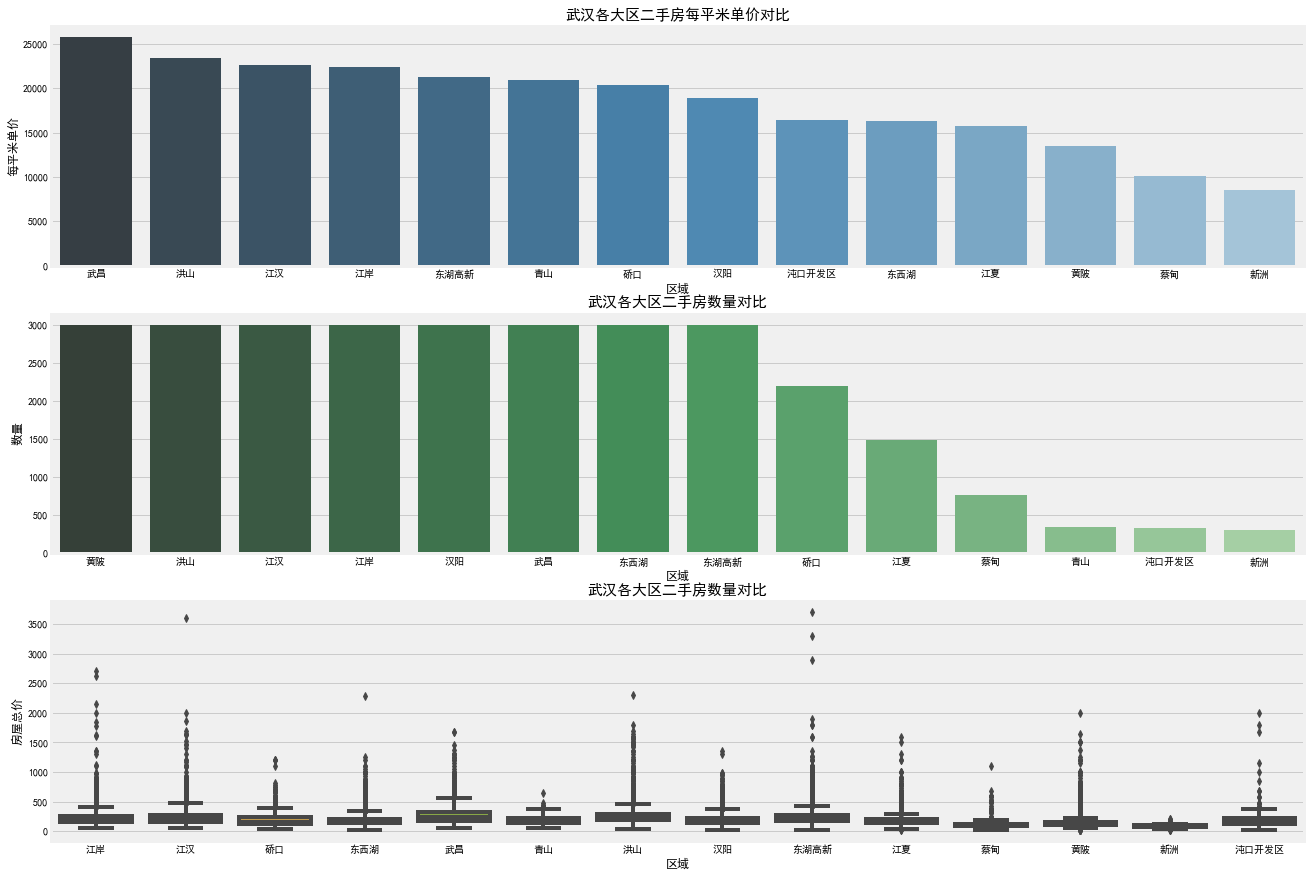

In [167]:
f, [ax1,ax2,ax3] = plt.subplots(3,1,figsize=(20,15)) #创建三行一列可视化图像分析
sns.barplot(x='Region',y='house_unit_price',palette='Blues_d',data=df_house_mean,ax=ax1)
ax1.set_title('武汉各大区二手房每平米单价对比',fontsize=15)
ax1.set_xlabel('区域')
ax1.set_ylabel('每平米单价')

sns.barplot(x='Region',y='Price',palette='Greens_d',data=df_house_count,ax=ax2)
ax2.set_title('武汉各大区二手房数量对比',fontsize=15)
ax2.set_xlabel('区域')
ax2.set_ylabel('数量')

sns.boxplot(x='Region',y='Price',data=df,ax=ax3)
ax3.set_title('武汉各大区二手房数量对比',fontsize=15)
ax3.set_xlabel('区域')
ax3.set_ylabel('房屋总价')

plt.show()

通过对武汉二手房‘每平方米均价’‘数量’‘房屋总价’条件进行分析，可得出以下几点：
1.综合武汉全区情况，武昌区均价为全市最高，其次为洪山，江汉，因为这个三个区涵盖了武汉各大商圈，临近长江，处于武汉正中心，经济实力强，其中武昌区最高均价为6.9万/每平方米。
2.二手房销售情况各区在售情况大都较为火爆，其中青山，沌口，新洲在售情况较少

G:\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


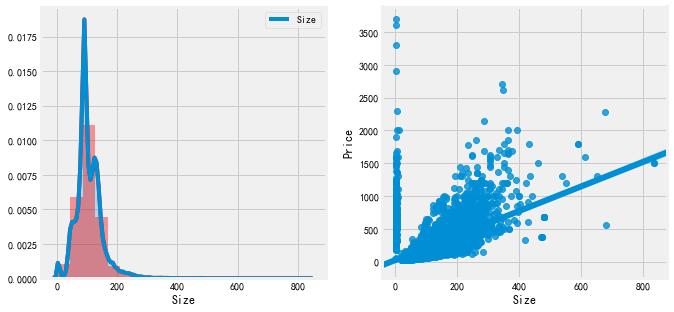

In [168]:
#size特征分析
fig,[ax1,ax2] = plt.subplots(1,2,figsize=(10,5))
#建房时间的分布情况
sns.distplot(df['Size'],bins=20,ax=ax1,color='r')
sns.kdeplot(df['Size'],shade=True,ax=ax1)
#建房时间和出售价格的关系
sns.regplot(x='Size',y='Price',data=df,ax=ax2)
plt.show()

根据第二张图表发现在房屋面积在10平方米左右，售价却超过百万的点，存在异常，故单独调出进行分析

In [169]:
df.loc[df['Size']< 10]

,Renovation,Garden,Layout,Size,Direction,Elevator,Year,Distric,Floor,Price,house_unit_price,Region
904,南 北,梦湖香郡,独栋别墅,3.0,234.31平米,none,2013,塔子湖,1层2,750.0,32009,江岸
921,南,佳海茗苑北区,联排别墅,3.0,171.61平米,其他,2014,后湖,3层2,420.0,24475,江岸
1317,南,梦湖香郡,联排别墅,5.0,273.94平米,none,2013,塔子湖,1层2,800.0,29204,江岸
1900,南,梦湖香郡,独栋别墅,5.0,205.15平米,none,2013,塔子湖,1层2,660.0,32172,江岸
5801,南 北,世纪江尚,联排别墅,5.0,468平米,其他,2016,前进江汉,5层2,3600.0,76924,江汉
8415,南 北,碧海花园,联排别墅,5.0,224平米,其他,2004,金银湖,2层2,400.0,17858,东西湖
8473,南 北,万科高尔夫城市花园,叠拼别墅,5.0,198.93平米,none,2003,金银湖,下叠(,450.0,22622,东西湖
8744,东 西,万科高尔夫城市花园,叠拼别墅,5.0,255.53平米,none,2003,金银湖,上叠(,460.0,18002,东西湖
8773,南 北,奥林匹克花园,联排别墅,4.0,191平米,none,2005,金银湖,3层2,360.0,18849,东西湖
8818,南 北,丰泽园别墅,联排别墅,5.0,194.78平米,其他,none,金银湖,3层板,380.0,19510,东西湖


发现此段数据是属于别墅区域，出现异常情况是因为别墅与二手房在售编写信息不同，导致爬虫爬取出现数据错位，另因此项目主要是针对二手房在售情况，别墅类型不在考虑中，故将此段数据进行清洗

In [170]:
df.loc[df['Price']>1800]

,Renovation,Garden,Layout,Size,Direction,Elevator,Year,Distric,Floor,Price,house_unit_price,Region
506,其他,武汉天地云廷五期,4室2厅,288.63,南 北,有电梯,2016,黄埔永清,中楼层,2150.0,74490,江岸
765,其他,武汉天地云廷五期,4室3厅,348.66,东南,有电梯,2016,黄埔永清,低楼层,2620.0,75145,江岸
1414,其他,武汉天地云廷五期,5室2厅,345.00,东南,有电梯,2016,黄埔永清,低楼层,2700.0,78261,江岸
1517,其他,武汉天地四期B11,4室2厅,262.00,南,有电梯,2013,黄埔永清,中楼层,1850.0,70611,江岸
1969,东南,梦湖香郡,独栋别墅,12.00,479.99平米,none,2013,塔子湖,1层2,2000.0,41668,江岸
3963,其他,泛海国际香海园,6室3厅,366.00,南 北,有电梯,2016,CBD西北湖,中楼层,1860.0,50820,江汉
5706,其他,泛海国际兰海园,6室3厅,365.18,南 北,有电梯,2014,CBD西北湖,中楼层,2000.0,54768,江汉
5801,南 北,世纪江尚,联排别墅,5.00,468平米,其他,2016,前进江汉,5层2,3600.0,76924,江汉
9713,其他,万科高尔夫城市花园,5室2厅,677.47,南 北,有电梯,2003,金银湖,3层2,2280.0,33655,东西湖
15480,东 南 西 北,丽岛花园,独栋别墅,7.00,438.16平米,none,2004,珞狮南路,3层2,2300.0,52493,洪山


In [171]:
df = df[df['Size']>12]

G:\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


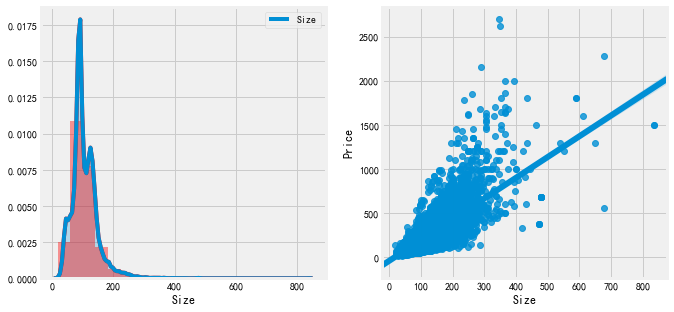

In [172]:
#size特征分析
fig,[ax1,ax2] = plt.subplots(1,2,figsize=(10,5))
#建房时间的分布情况
sns.distplot(df['Size'],bins=20,ax=ax1,color='r')
sns.kdeplot(df['Size'],shade=True,ax=ax1)
#建房时间和出售价格的关系
sns.regplot(x='Size',y='Price',data=df,ax=ax2)
plt.show()

通过 绘制柱状图观察 Size 特征的分布情况，属于长尾类型的分布，这说明了有很多面积很大且超出正常范围的二手房。
通过 regplot 绘制了 Size 和 Price 之间的散点图，发现 Size 特征基本与Price呈现线性关系，符合基本常识，面积越大，价格越高。

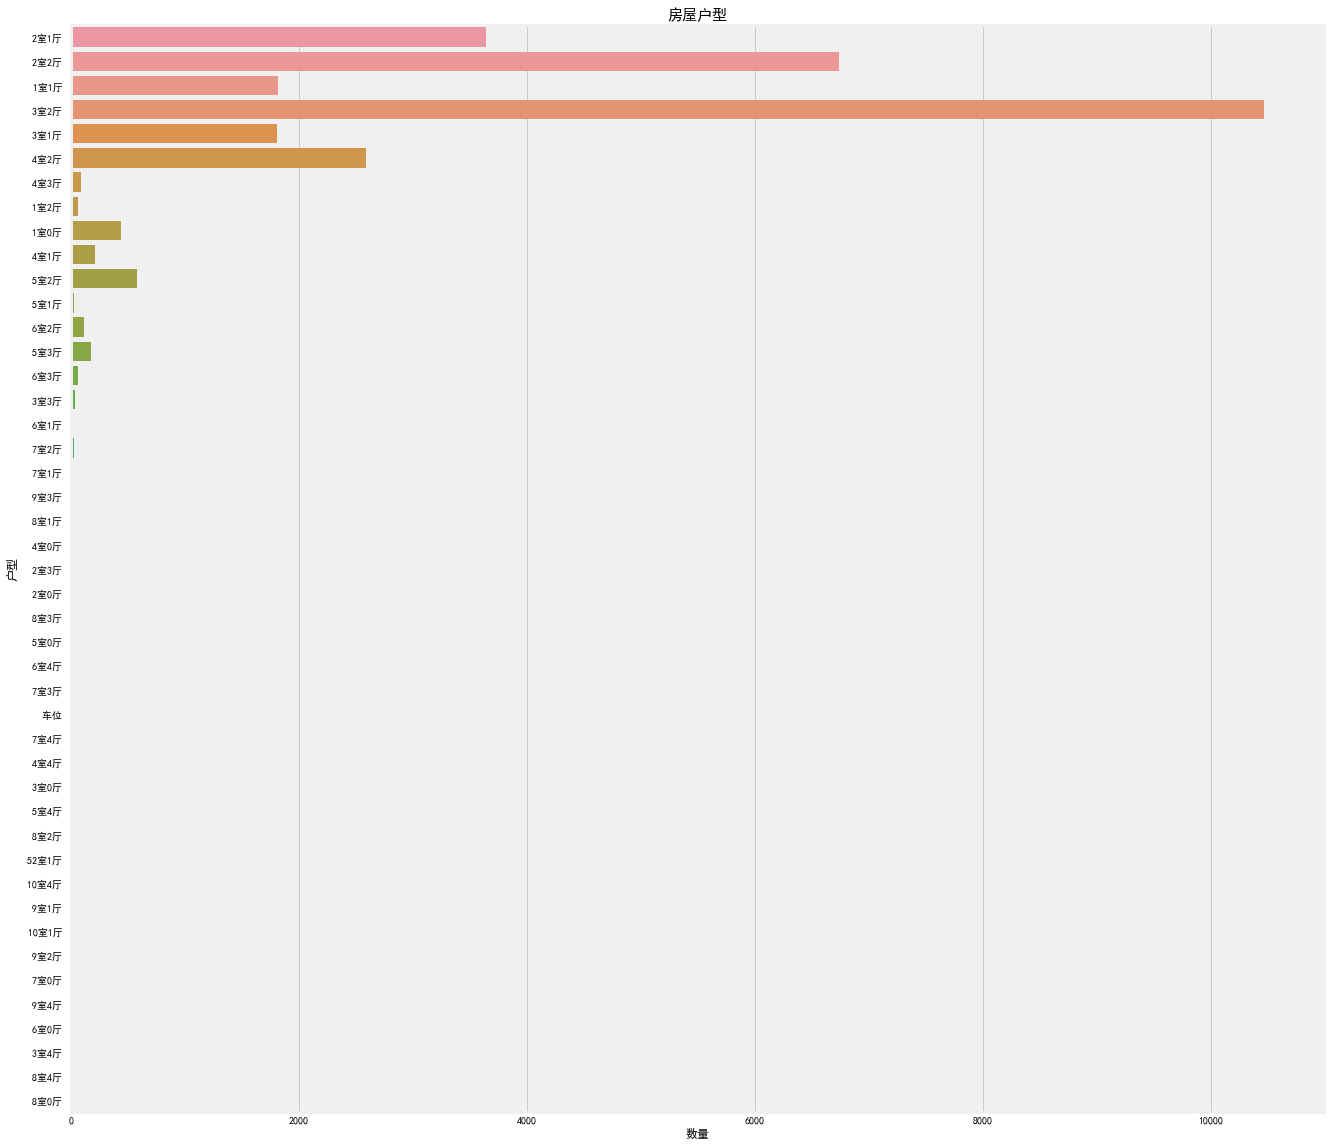

In [173]:
#layout特征分析
fig,ax1 = plt.subplots(figsize=(20,20))
sns.countplot(y='Layout',data=df,ax=ax1)
ax1.set_title('房屋户型',fontsize=15)
ax1.set_xlabel('数量')
ax1.set_ylabel('户型')
plt.show()

通过对二手房布局数据进行分析，可得出在售布局类型还是挺多，但数量主要呈现2室一厅，二室二厅，三室2厅这样房屋布局

In [174]:
df['Layout'].value_counts()

 3室2厅      10469
 2室2厅       6739
 2室1厅       3639
 4室2厅       2594
 1室1厅       1815
 3室1厅       1808
 5室2厅        580
 1室0厅        441
 4室1厅        211
 5室3厅        173
 6室2厅        116
 4室3厅         89
 6室3厅         67
 1室2厅         60
 3室3厅         35
 5室1厅         25
 7室2厅         25
 7室3厅         17
 6室4厅         13
 8室3厅          9
 车位            8
 5室4厅          8
 6室1厅          8
 4室4厅          7
 2室0厅          7
 2室3厅          5
 8室2厅          4
 9室3厅          3
 8室4厅          3
 3室0厅          3
 7室4厅          3
 8室1厅          2
 7室0厅          1
 3室4厅          1
 10室1厅         1
 9室4厅          1
 4室0厅          1
 10室4厅         1
 52室1厅         1
 6室0厅          1
 7室1厅          1
 9室2厅          1
 5室0厅          1
 9室1厅          1
 8室0厅          1
Name: Layout, dtype: int64

Renovation装修特征中因有南北，它属于朝向的类型，可能是因为爬虫过程中一些信息位置为空，导致“Direction”朝向特征错位，所以需要清除或替换掉。

In [175]:
df['Renovation']=[i.strip() for i in df['Renovation']]

In [176]:
df['Renovation'] = df.loc[(df['Renovation'] != '无电梯'), 'Renovation']

In [177]:
df['Renovation'] = df.loc[(df['Renovation'] != 'none'), 'Renovation']

In [178]:
df['Renovation'].value_counts()

其他    22843
精装     3221
简装     1760
毛坯     1167
Name: Renovation, dtype: int64

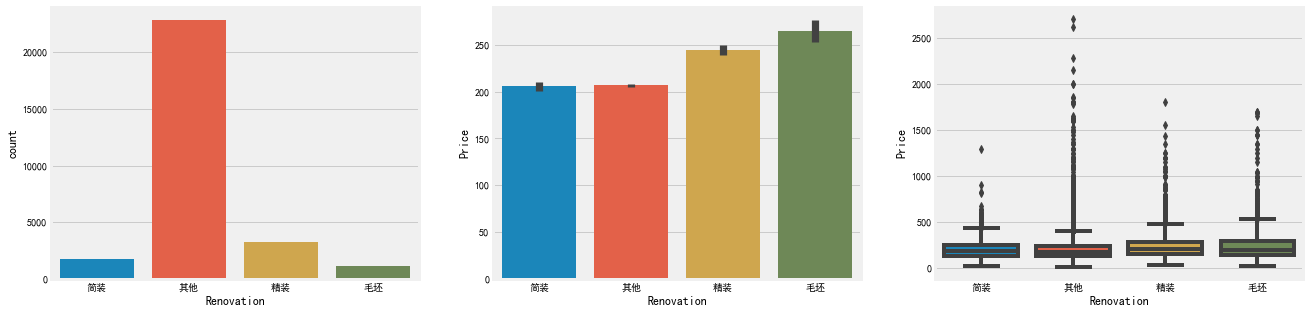

In [179]:
fig,[ax1,ax2,ax3] = plt.subplots(1,3,figsize=(20,5))
sns.countplot(df['Renovation'],ax=ax1)
sns.barplot(x='Renovation', y='Price', data=df, ax=ax2)
sns.boxplot(x='Renovation',y='Price',data=df,ax=ax3)
plt.show()

排开‘其他’装修情况，观察到，精装修的二手房数量最多，简装其次，也是我们平日常见的。而对于价格来说，毛坯类型却是最高，其次是精装修。

In [180]:
#Elevator 特征分析
misn = len(df.loc[(df['Elevator']=='none'),'Elevator'])
print('Elevator缺失值数量为：'+ str(misn))

Elevator缺失值数量为：10030


In [181]:
df['Elevator'].value_counts()

 有电梯    13641
none    10030
 无电梯     5328
Name: Elevator, dtype: int64

因Elevator特征中存在数据爬取错位情况，估将无效数据进行清洗便于进行分析

In [182]:
df['Elevator']=[i.strip() for i in df['Elevator']]
df['Renovation'] = df.loc[(df['Renovation'] != '无电梯'), 'Renovation']
df['Renovation'] = df.loc[(df['Renovation'] != '无电梯'), 'Renovation']

In [183]:
df['Elevator'] = df.loc[(df['Elevator'] == '有电梯')|(df['Elevator'] == '无电梯'), 'Elevator']

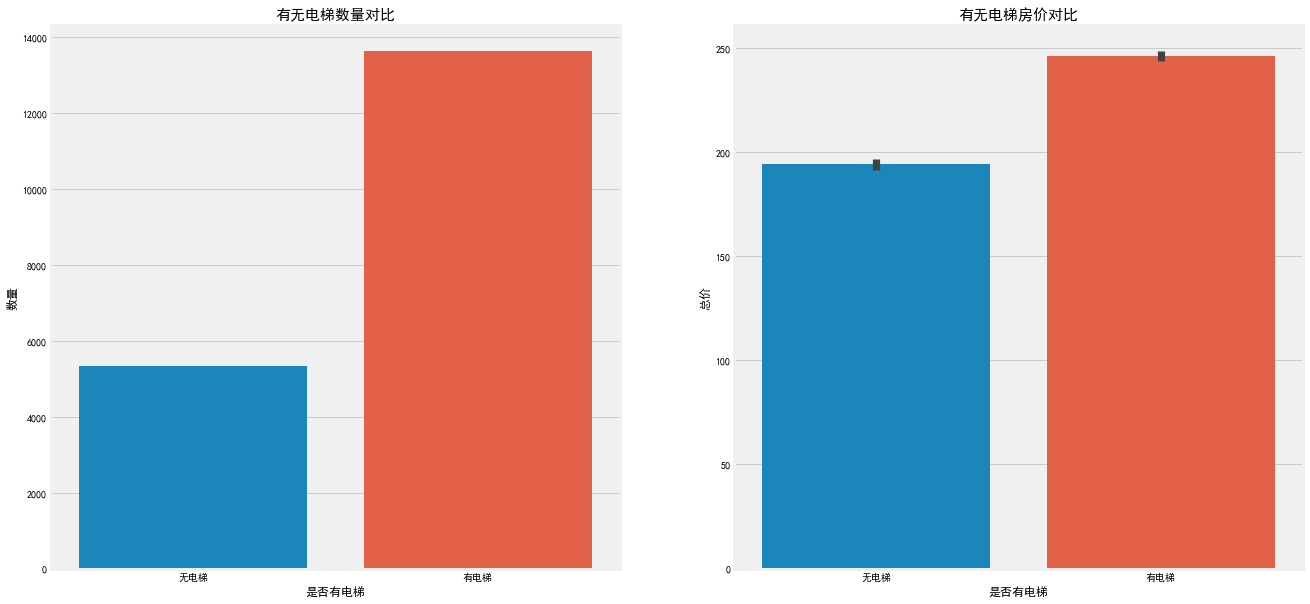

In [184]:
df.loc[(df['Floor']=='中楼层')&(df['Elevator']=='none'),'Elevator'] = '有电梯'
df.loc[(df['Floor']=='高楼层')&(df['Elevator']=='none'),'Elevator'] = '有电梯'
df.loc[(df['Floor']=='低楼层')&(df['Elevator']=='none'),'Elevator'] = '无电梯'

fig,[ax1,ax2] = plt.subplots(1,2,figsize=(20,10))
sns.countplot(df['Elevator'],ax=ax1)
ax1.set_title('有无电梯数量对比',fontsize=15)
ax1.set_xlabel('是否有电梯')
ax1.set_ylabel('数量')
sns.barplot(x='Elevator',y='Price',data=df,ax=ax2)
ax2.set_title('有无电梯房价对比',fontsize=15)
ax2.set_xlabel('是否有电梯')
ax2.set_ylabel('总价')
plt.show()

观察到 ，目前在售二手房有电梯数量居多，符合现在合理土地利用率，相应的，有电梯的售房售价也会相应的提高起来。

In [185]:
#floor特征分析
df['Floor'] = df.loc[(df['Floor'] == '高楼层')|(df['Floor'] == '中楼层')|(df['Floor'] == '低楼层'), 'Floor']

In [186]:
df['Floor'].value_counts()

高楼层    10029
中楼层    10020
低楼层     8850
Name: Floor, dtype: int64

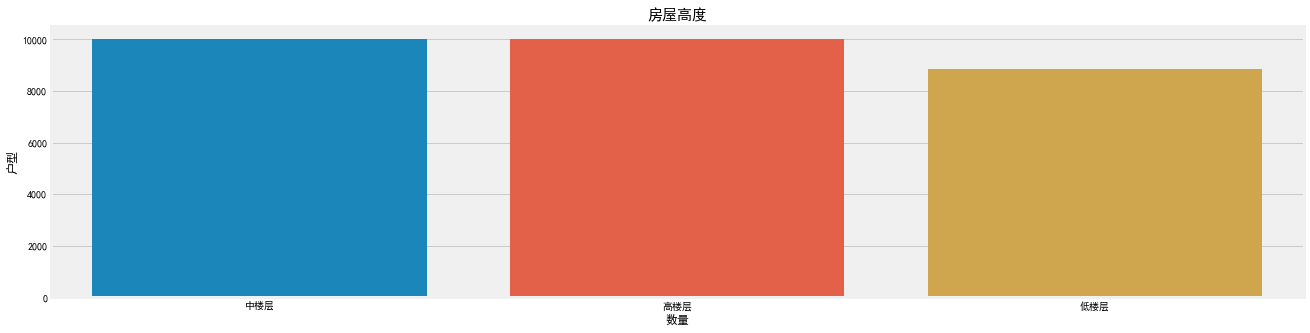

In [187]:
fig,ax1 = plt.subplots(figsize=(20,5))
sns.countplot(x='Floor',data=df,ax=ax1)
ax1.set_title('房屋高度',fontsize=15)
ax1.set_xlabel('数量')
ax1.set_ylabel('户型')
plt.show()

结合上面‘Elevator’特征数据，可得出目前小区因为中高层类型较多，自然提高了电梯的安装情况，且目前小区建立高层也是趋势所在。